In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df = pd.read_csv('lrreg_data.csv')
df.head()

,Id,Car_Name,Aspirational_Value,Age,km_driven,fuel,transmission,selling_price
0,1,WagonR,General,15,50000,Petrol,Manual,135000
1,7,Indigo,General,8,60000,Petrol,Manual,240000
2,9,Celerio,General,5,78000,CNG,Manual,365000
3,17,Amaze,General,8,141000,Diesel,Manual,450000
4,19,Xcent,General,6,25000,Petrol,Manual,550000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  1200 non-null   int64 
 1   Car_Name            1200 non-null   object
 2   Aspirational_Value  1200 non-null   object
 3   Age                 1200 non-null   int64 
 4   km_driven           1200 non-null   int64 
 5   fuel                1200 non-null   object
 6   transmission        1200 non-null   object
 7   selling_price       1200 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 75.1+ KB


In [4]:
df.isna().sum()

Id                    0
Car_Name              0
Aspirational_Value    0
Age                   0
km_driven             0
fuel                  0
transmission          0
selling_price         0
dtype: int64

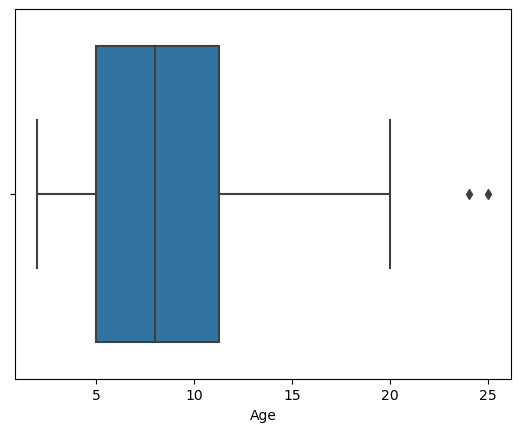

In [5]:
sns.boxplot(x='Age', data=df)
plt.show()

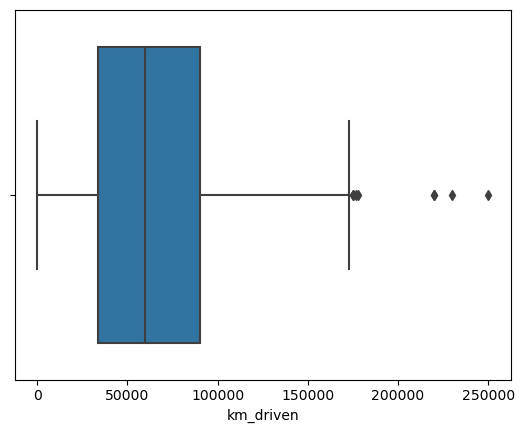

In [6]:
sns.boxplot(x='km_driven', data=df)
plt.show()

In [7]:
## Outlier treatment with Z Score

threshold = 3
outlier = []

for i in df['Age']:
    z = (i-df['Age'].mean())/df['Age'].std()
    if z > threshold:
        outlier.append(i)
        
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))

## calculate the median for the column excluding the outlier
med = df.loc[df['Age']<= min(outlier), 'Age'].median()
print('Median of the column excluding outliers-->',med)

f = lambda x: med if x>= min(outlier) else x
df['out_treated_age'] = df['Age'].map(f)

max(df['out_treated_age'])

df.drop(['Age'], axis=1,inplace = True)

outlier in dataset is [25, 24]
minimum of the outlier list 24
Median of the column excluding outliers--> 8.0


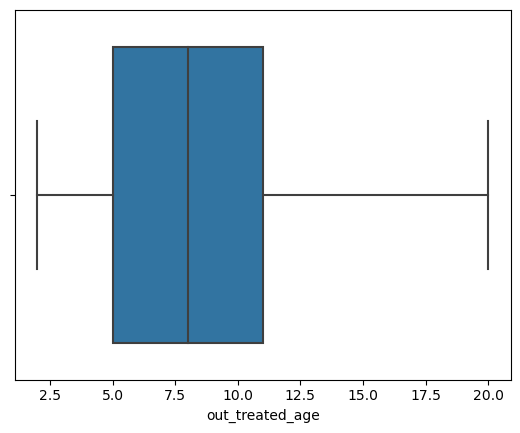

In [8]:
sns.boxplot(x='out_treated_age', data=df)
plt.show()

In [9]:
## Outlier treatment with Z Score

threshold = 3
outlier = []

for i in df['km_driven']:
    z = (i-df['km_driven'].mean())/df['km_driven'].std()
    if z > threshold:
        outlier.append(i)
        
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))

## calculate the median for the column excluding the outlier
med = df.loc[df['km_driven']<= min(outlier), 'km_driven'].median()
print('Median of the column excluding outliers-->',med)

f = lambda x: med if x>= min(outlier) else x
df['out_treated_km_driven'] = df['km_driven'].map(f)

max(df['out_treated_km_driven'])

df.drop(['km_driven'], axis=1,inplace = True)

outlier in dataset is [230000, 220000, 220000, 250000]
minimum of the outlier list 220000
Median of the column excluding outliers--> 60000.0


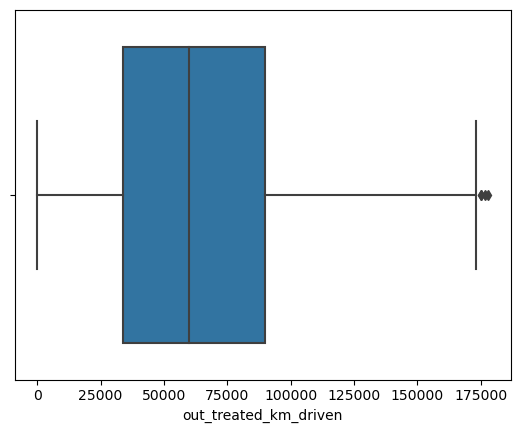

In [10]:
sns.boxplot(x='out_treated_km_driven', data=df)
plt.show()

In [11]:
data = df.drop('Car_Name',axis=1)
dummy_data = pd.get_dummies(data,drop_first = True)
dummy_data.columns

Index(['Id', 'selling_price', 'out_treated_age', 'out_treated_km_driven',
       'Aspirational_Value_Premium', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'transmission_Manual'],
      dtype='object')

In [12]:
y=dummy_data['selling_price']
X=dummy_data.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test,y_test], axis = 1)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
reg_model = model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     130.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.73e-147
Time:                        22:25:38   Log-Likelihood:                -13801.
No. Observations:                 960   AIC:                         2.762e+04
Df Residuals:                     951   BIC:                         2.766e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [17]:
# 2nd Iteration of model training
#  ['Id', 'selling_price', 'out_treated_age', 'out_treated_km_driven',
#        'Aspirational_Value_Premium', 'fuel_Diesel', 'fuel_LPG', 
# 'fuel_Petrol', 'transmission_Manual']
formula = 'selling_price ~ out_treated_age + out_treated_km_driven + Aspirational_Value_Premium + fuel_Diesel + \
            fuel_Petrol + fuel_LPG + transmission_Manual'

X_train = sm.add_constant(X_train)
model2 = smf.ols(formula,data = train_data)
reg_model2 = model2.fit()
print(reg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.51e-148
Time:                        22:31:52   Log-Likelihood:                -13802.
No. Observations:                 960   AIC:                         2.762e+04
Df Residuals:                     952   BIC:                         2.766e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [19]:
train_data_for_pred = train_data[['out_treated_age','out_treated_km_driven','Aspirational_Value_Premium','fuel_Diesel',\
                                 'fuel_LPG','fuel_Petrol','transmission_Manual']]

train_data_for_pred = sm.add_constant(train_data_for_pred)
train_pred = reg_model2.predict(train_data_for_pred)

test_data_for_pred = test_data[['out_treated_age','out_treated_km_driven','Aspirational_Value_Premium','fuel_Diesel',\
                                 'fuel_LPG','fuel_Petrol','transmission_Manual']]
test_data_for_pred = sm.add_constant(test_data_for_pred)
test_pred = reg_model2.predict(test_data_for_pred)

In [20]:
train_residuals = abs(train_data['selling_price']) - abs(train_pred)

test_residuals = abs(test_data['selling_price']) - abs(test_pred)


2.473513444537196e-25
0.0


C:\Users\91984\anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),
C:\Users\91984\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


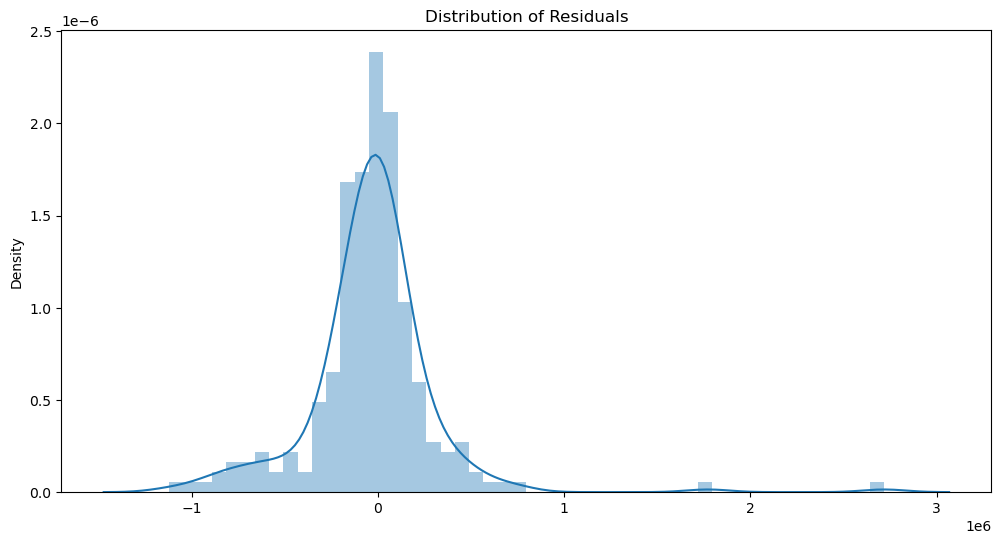

'Residuals are not normally distributed, try after data transformation'

In [21]:
## Assumption-1 if the residuals are normally distributed

'''
H0 :- Data is normally distributed
H1:- Data is not normally distributed '''

print(normal_ad(test_residuals)[1])
print(normal_ad(train_residuals)[1])

plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(test_residuals)
plt.show()
'''Residuals are not normally distributed, try after data transformation'''




In [23]:
## Log transformation

train_data['selling_price_log'] = np.log(train_data['selling_price'])
train_data['out_treated_age_log'] = np.log(train_data['out_treated_age'])
train_data['out_treated_km_driven_log'] = np.log(train_data['out_treated_km_driven'])

test_data['selling_price_log'] = np.log(test_data['selling_price'])
test_data['out_treated_age_log'] = np.log(test_data['out_treated_age'])
test_data['out_treated_km_driven_log'] = np.log(test_data['out_treated_km_driven'])

log_y_train = train_data['selling_price_log']


formula = 'out_treated_age','out_treated_km_driven','Aspirational_Value_Premium','fuel_Diesel',\
                                 'fuel_LPG','fuel_Petrol','transmission_Manual'

X_train = sm.add_constant(X_train)
model3 = smf.ols(formula,data = train_data)
reg_model3 = model3.fit()
print(reg_model3.summary())



PatsyError: don't know what to do with a length 7 matrices tuple